In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
                                    StratifiedKFold, 
                                    cross_validate
                                    )
from sklearn.metrics import (
                            confusion_matrix,                             
                            f1_score,
                            accuracy_score,
                            precision_score,
                            recall_score
                            )
warnings.filterwarnings('ignore')

In [4]:
X_train = np.load("../artifacts/X_train_resampled.npz", allow_pickle=True)['arr_0']
Y_train = np.load("../artifacts/Y_train_resampled.npz", allow_pickle=True)['arr_0']
X_test = np.load('../artifacts/X_test.npz', allow_pickle=True)['arr_0']
Y_test = np.load('../artifacts/Y_test.npz', allow_pickle=True)['arr_0']

In [5]:
cv = StratifiedKFold(
                    n_splits=6,
                    random_state=42,
                    shuffle=True
                    )

In [6]:
model_lr = LogisticRegression(
                            random_state = 42,
                            max_iter = 1000      
                            )

In [7]:
cv_results = cross_validate(
                            model_lr,
                            X_train,
                            Y_train,
                            cv=cv, scoring='precision',
                            return_train_score=False
                            )
score_arr = ['accuracy', 'precision', 'recall', 'f1']
for score in score_arr:
    cv_results = cross_validate(
                                model_lr,
                                X_train,
                                Y_train,
                                cv=cv, scoring=score,
                                return_train_score=False
                                )
    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)

    print(f"{score} : {test_score_avg}")

accuracy : 0.8387429243158647
precision : 0.8334267132947653
recall : 0.8467304598283097
f1 : 0.8400021668267413


In [8]:
cv_results = cross_validate(
                            model_lr,
                            X_train, Y_train,
                            cv=cv, scoring='f1',
                            return_train_score=False
                            )
cv_results

{'fit_time': array([0.05721211, 0.04756188, 0.04683757, 0.05493093, 0.05850768,
        0.04746795]),
 'score_time': array([0.00296211, 0.00288296, 0.0028882 , 0.00290728, 0.00285792,
        0.00287533]),
 'test_score': array([0.83381503, 0.84390592, 0.83633742, 0.83007954, 0.84325109,
        0.85262401])}

In [9]:
best_index = np.argmax(cv_results['test_score'])
fold_indices = list(cv.split(X_train, Y_train))

best_train_idx, best_test_idx = fold_indices[best_index]

X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

In [10]:
model_lr = LogisticRegression(
                            random_state = 42,
                            max_iter = 1000      
                            )
model_lr.fit(X_train_best, Y_train_best)

LogisticRegression(max_iter=1000, random_state=42)

In [11]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

In [12]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1_score = f1_score(Y_test, Y_hat_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.7725657427149965
Precision: 0.5622119815668203
Recall: 0.6524064171122995
F1 Score: 0.6039603960396039


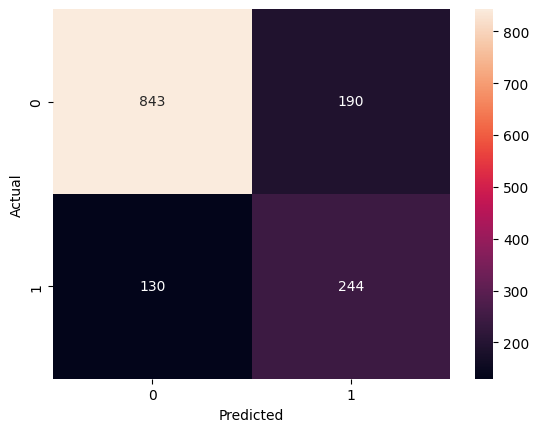

In [13]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()